# Project 3
## DSC 680 
## 11/15/2024

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load the dataset
crc = pd.read_csv('UCI_Credit_Card 3.csv')

In [4]:
# Check the dataset
crc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Check if there is any missing dat
crc.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There is no missing values from the dataset

In [6]:
# Rename the column "default.payment.next.month" to "Default"
crc.rename(columns={"default.payment.next.month":"DEFAULT"}, inplace=True)

In [7]:
# Drop any features that are not useful for your model building 
# I will drop the column"ID" as it is just a unique identifier for each credit card holder and do not have any predictive power
crc = crc.drop(columns=["ID"])

In [8]:
# Check with the df with the updates
crc.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [9]:
# List the categorical and numerical columns
# categorical columns
cat_col = ["SEX", "EDUCATION", "MARRIAGE", "DEFAULT"]
# numerical columns
num_col = crc.columns.difference(cat_col)

In [10]:
# The category of the "EDUCATION" (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=undefined)
# Check the group under "EDUCATION"
crc.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [11]:
# I will combine the group 4,5,6,0 into the Group 4 as others
crc["EDUCATION"] = crc["EDUCATION"].replace([0,5,6],4)

In [12]:
# Check for the update
crc.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [13]:
# Check the variables of "MARRIAGE" and seems like there are random category 0 which is not defined
crc.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [14]:
# Combine the 0 into the Group 3(Other)
crc["MARRIAGE"] = crc["MARRIAGE"].replace([0],3)

In [15]:
crc.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [16]:
# Define a function to cap outliers based on specified percentiles


# Apply capping to each numerical column
for col in num_col:
    lower = crc[col].quantile(0.05)
    upper = crc[col].quantile(0.95)
    crc[col] = crc[col].clip(lower, upper)


# Display the first few rows after capping outliers
crc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.00,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.00,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.00,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.00,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,53,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,19004.35,10000.0,9000.0,689.0,679.0,0


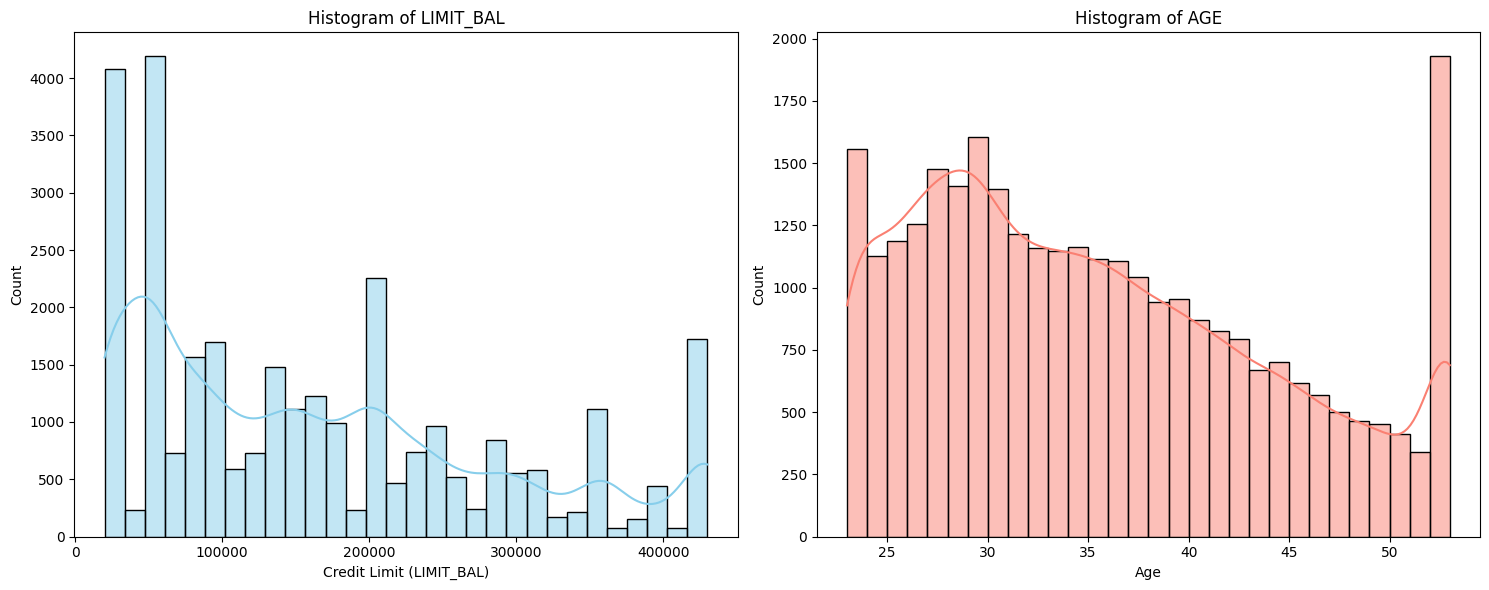

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(crc['LIMIT_BAL'], bins=30, color='skyblue', kde=True)
plt.title('Histogram of LIMIT_BAL')
plt.xlabel('Credit Limit (LIMIT_BAL)')

plt.subplot(1, 2, 2)
sns.histplot(crc['AGE'], bins=30, color='salmon', kde=True)
plt.title('Histogram of AGE')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

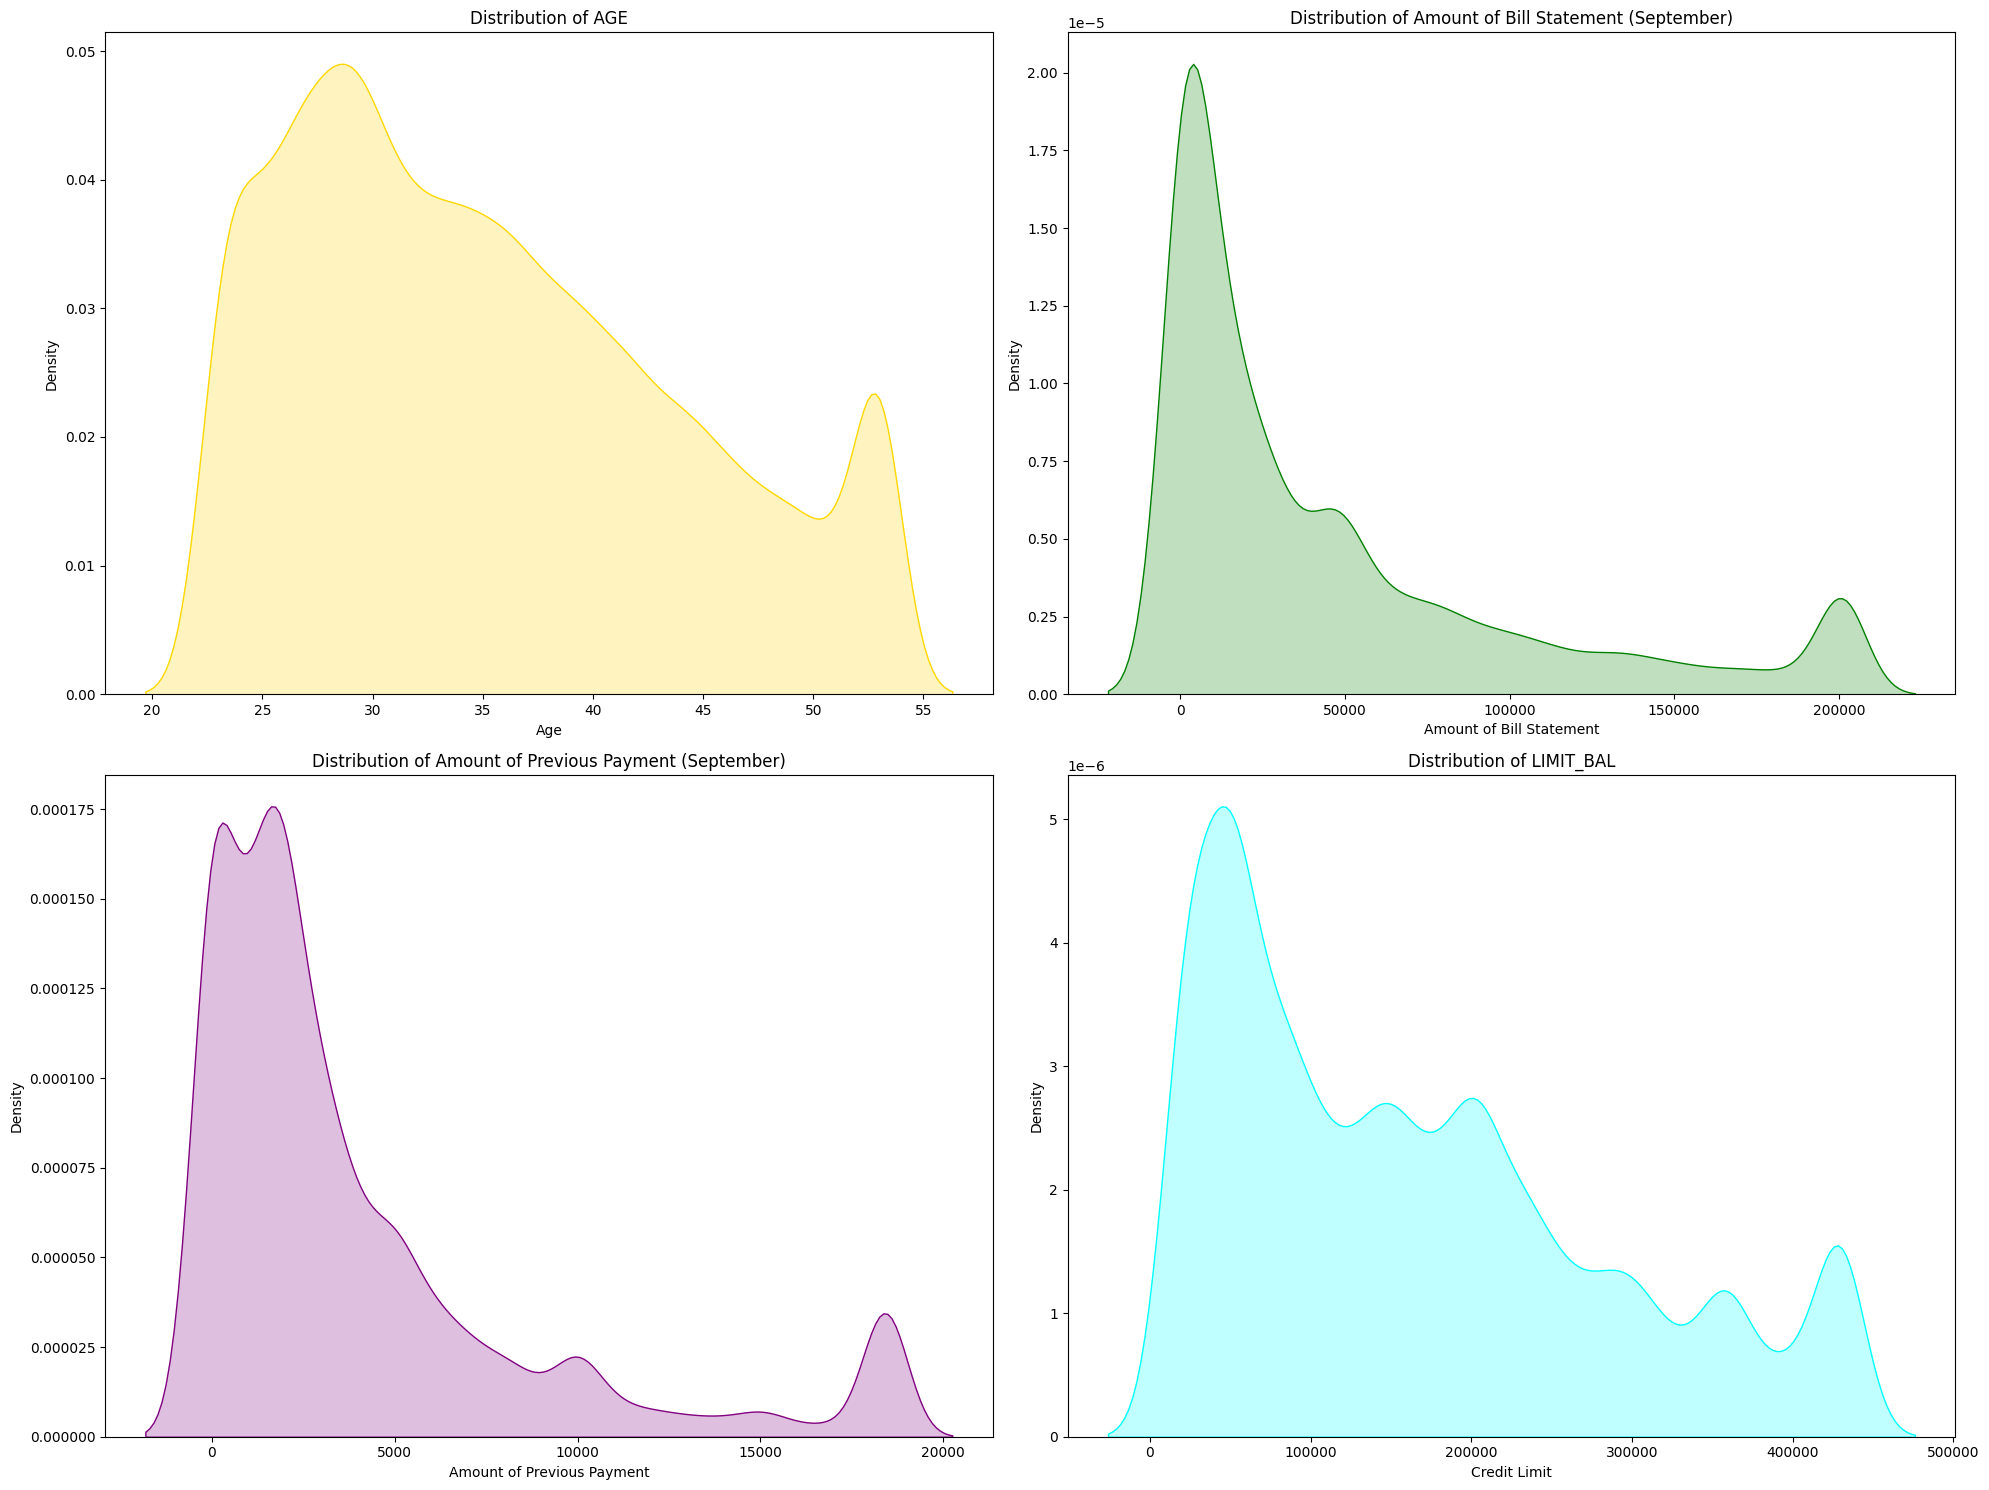

In [18]:
# Distribution Plots for "AGE", "BILL_AMT1", "PAY_AMT1", and "LIMIT_BAL"
plt.figure(figsize=(20, 15))

# Distribution plot for AGE
plt.subplot(2, 2, 1)
sns.kdeplot(crc['AGE'], shade=True, color='gold')
plt.title('Distribution of AGE')
plt.xlabel('Age')

# Distribution plot for BILL_AMT1
plt.subplot(2, 2, 2)
sns.kdeplot(crc['BILL_AMT1'], shade=True, color='green')
plt.title('Distribution of Amount of Bill Statement (September)')
plt.xlabel('Amount of Bill Statement')

# Distribution plot for PAY_AMT1
plt.subplot(2, 2, 3)
sns.kdeplot(crc['PAY_AMT1'], shade=True, color='purple')
plt.title('Distribution of Amount of Previous Payment (September)')
plt.xlabel('Amount of Previous Payment')

# Distribution plot for LIMIT_BAL
plt.subplot(2, 2, 4)
sns.kdeplot(crc['LIMIT_BAL'], shade=True, color='cyan')
plt.title('Distribution of LIMIT_BAL')
plt.xlabel('Credit Limit')

plt.tight_layout()
plt.show()

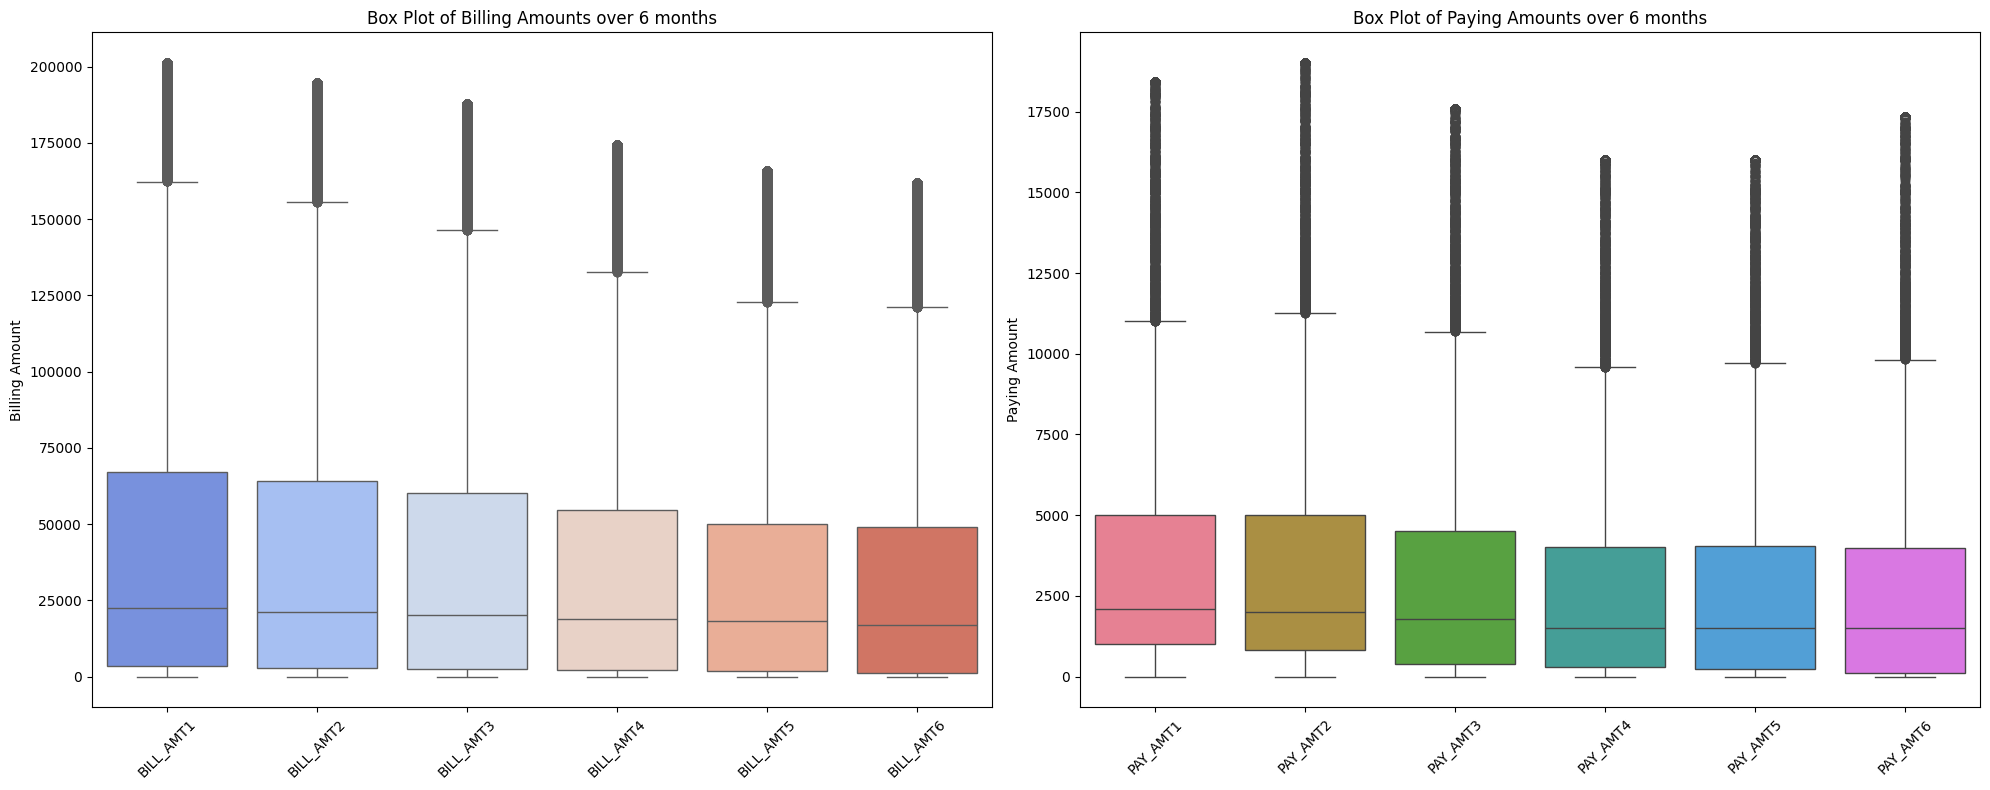

In [19]:
# Box Plots for Billing and Paying Amounts over 6 months

plt.figure(figsize=(20, 8))

# Box plot for Billing Amounts
plt.subplot(1, 2, 1)
sns.boxplot(data=crc[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], palette="coolwarm")
plt.title('Box Plot of Billing Amounts over 6 months')
plt.xticks(rotation=45)
plt.ylabel('Billing Amount')

# Box plot for Paying Amounts
plt.subplot(1, 2, 2)
sns.boxplot(data=crc[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], palette="husl")
plt.title('Box Plot of Paying Amounts over 6 months')
plt.xticks(rotation=45)
plt.ylabel('Paying Amount')

plt.tight_layout()
plt.show()

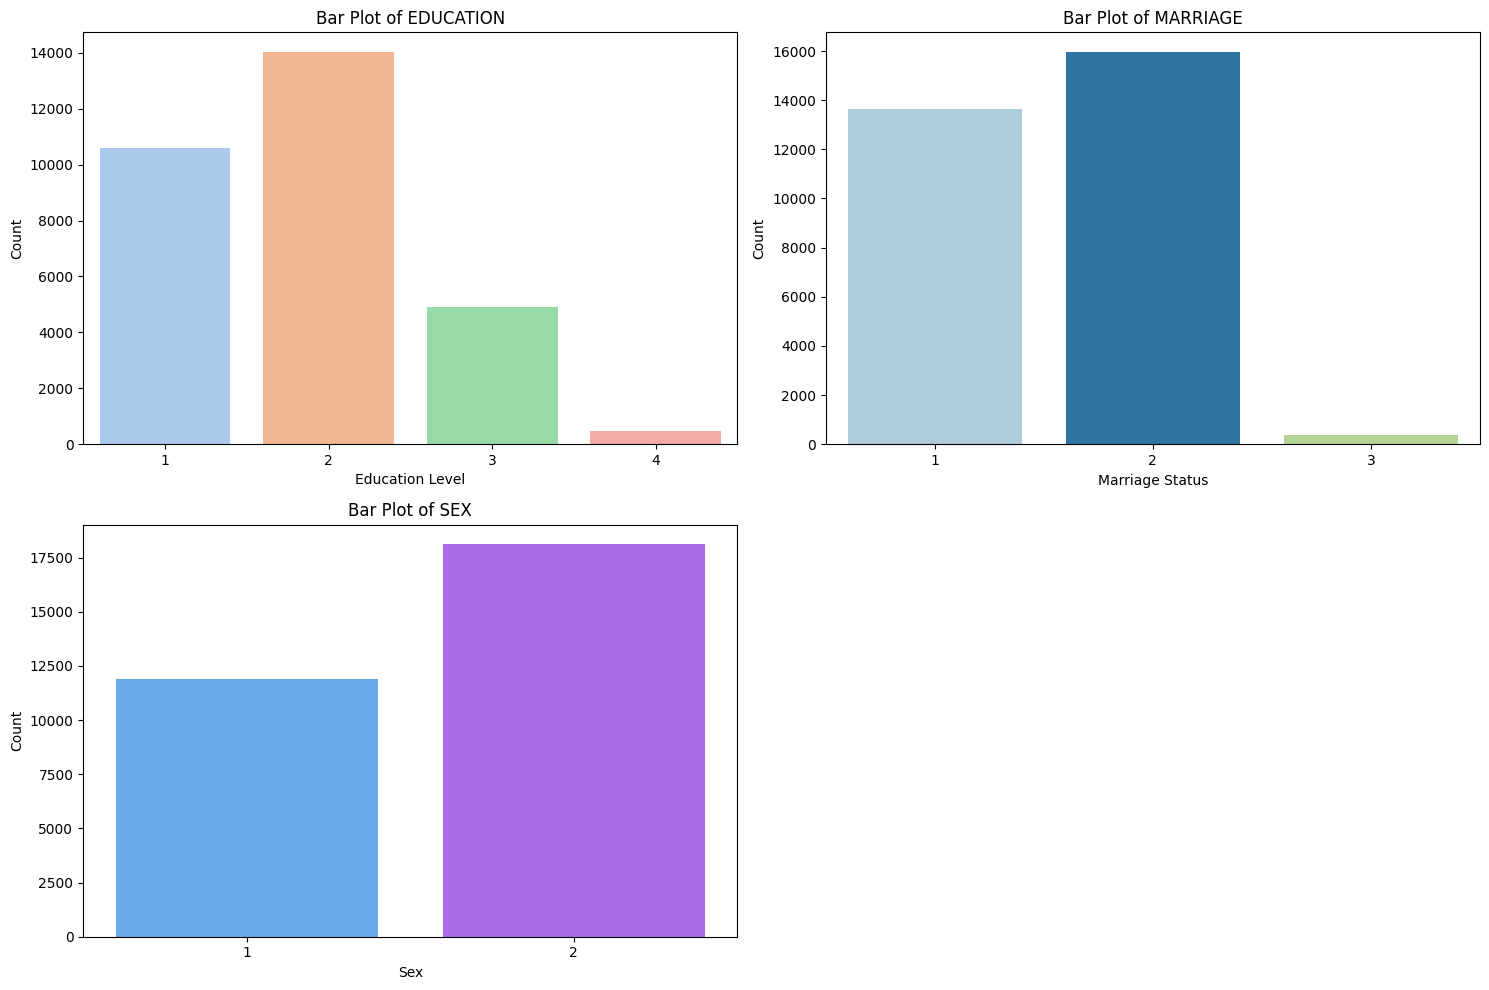

In [20]:
# Bar Plots for EDUCATION, MARRIAGE, and SEX

plt.figure(figsize=(15, 10))

# Bar plot for EDUCATION
plt.subplot(2, 2, 1)
sns.countplot(x='EDUCATION', data=crc, palette='pastel')
plt.title('Bar Plot of EDUCATION')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Bar plot for MARRIAGE
plt.subplot(2, 2, 2)
sns.countplot(x='MARRIAGE', data=crc, palette='Paired')
plt.title('Bar Plot of MARRIAGE')
plt.xlabel('Marriage Status')
plt.ylabel('Count')

# Bar plot for SEX
plt.subplot(2, 2, 3)
sns.countplot(x='SEX', data=crc, palette='cool')
plt.title('Bar Plot of SEX')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

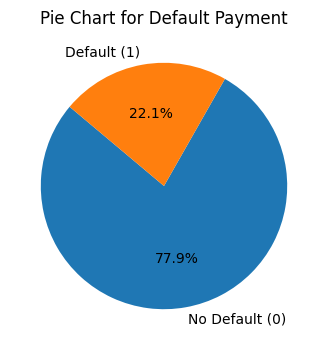

In [21]:
default_counts = crc["DEFAULT"].value_counts()
labels = default_counts.index.map({0: 'No Default (0)', 1: 'Default (1)'}).tolist()
plt.figure(figsize=(6,4))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for Default Payment')
plt.show()

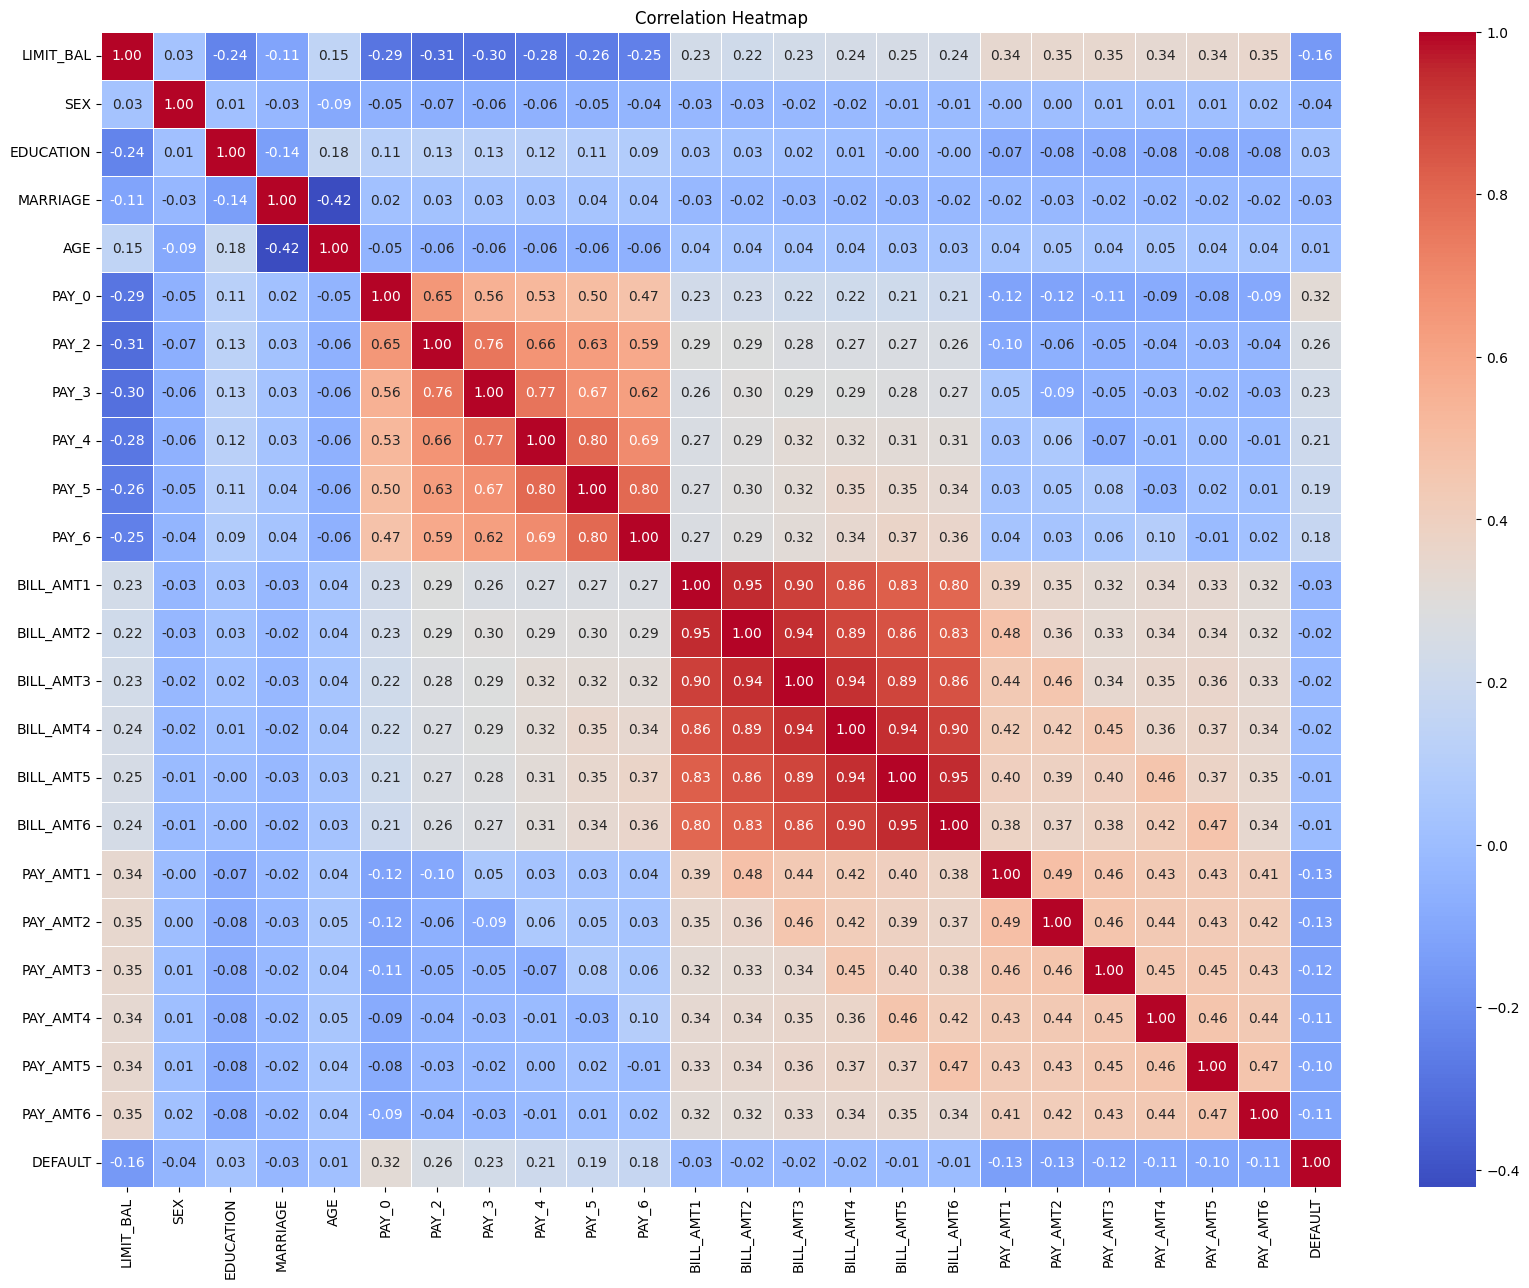

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(crc.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Create the dummy variables for the categorical data("SEX", "EDUCATION" and "MARRIAGE")
# The dummy variables will help to capture the non-linear relationships and improve the model accuracy 
ca_columns = ["SEX", "EDUCATION", "MARRIAGE"]
crc = pd.get_dummies(crc, columns=ca_columns, drop_first=True)

In [24]:
crc.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,1,True,True,False,False,False,False
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1000.0,0.0,2000.0,1,True,True,False,False,True,False
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,5000.0,0,True,True,False,False,True,False
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1100.0,1069.0,1000.0,0,True,True,False,False,False,False
4,50000.0,53,-1,0,-1,0,0,0,8617.0,5670.0,...,9000.0,689.0,679.0,0,False,True,False,False,False,False


In [25]:
# Separating features and target variable
x = crc.drop("DEFAULT", axis=1)
y = crc["DEFAULT"]

In [26]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Confirming the shape of the training and testing data
X_train.shape, X_test.shape

((24000, 26), (6000, 26))

In [28]:
# Standardizing the data
# Initializing the StandardScaler
scaler = StandardScaler()

In [29]:
# Fitting the scaler to the training data and transforming it
X_train_scaled = scaler.fit_transform(X_train)

# Using the scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

In [30]:
# Initialize the Logistic Regression Model
logReg = LogisticRegression()

In [31]:
# Fit the Logistic Regression Model
logReg.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
# Predictions for the Logistic Regression Model 
logReg_pred = logReg.predict(X_test_scaled)

# The accuracy score for the Logistic Regression Model
print(f"Accuracy Score for Logistic Regression Model is {accuracy_score(y_test, logReg_pred)}\n" )
print(f"The report for the Logistric Regression Modeel \n {classification_report(y_test, logReg_pred)}")

Accuracy Score for Logistic Regression Model is 0.8113333333333334

The report for the Logistric Regression Modeel 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      4687
           1       0.67      0.27      0.39      1313

    accuracy                           0.81      6000
   macro avg       0.75      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

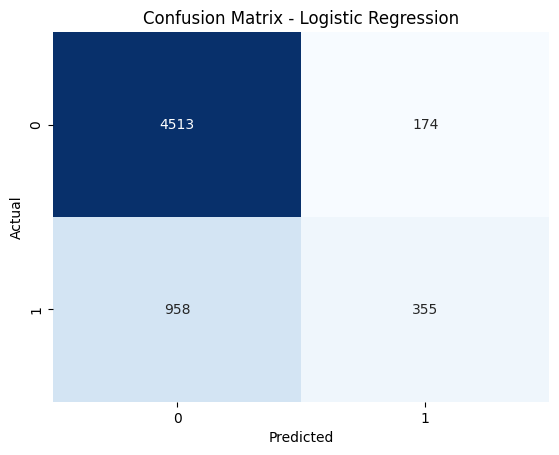

In [33]:
# Create the confusion Matrix 
confusion_logReg = confusion_matrix(y_test, logReg_pred)
sns.heatmap(confusion_logReg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

In [34]:
# Initialize the Decision Tree Model
DT = DecisionTreeClassifier()

In [35]:
# Fit the Logistic Regression Model
DT.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [36]:
# Predictions
DT_pred = DT.predict(X_test_scaled)

# The accuracy score for the Logistic Regression Model
print(f"Accuracy Score for Decision Tree Model is {accuracy_score(y_test, DT_pred)}\n" )
print(f"The report for the Decision Tree Model \n {classification_report(y_test, DT_pred)}")

Accuracy Score for Decision Tree Model is 0.7238333333333333

The report for the Decision Tree Model 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

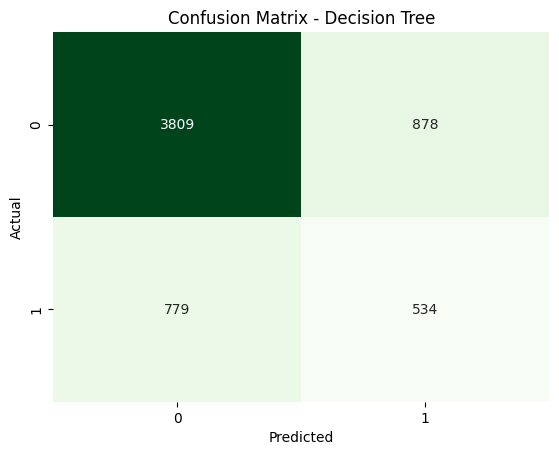

In [37]:
confusion_DT = confusion_matrix(y_test, DT_pred)
sns.heatmap(confusion_DT, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

In [38]:
# Initialize the Random Forest Model
RF = RandomForestClassifier()

In [39]:
# Fit the Random Forest Model
RF.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [40]:
# Predictions for Random Forest
RF_pred = RF.predict(X_test_scaled)

# The accuracy score for the Logistic Regression Model
print(f"Accuracy Score for Random Forest Model is {accuracy_score(y_test, RF_pred)}\n" )
print(f"The report for the Random Forest Model \n {classification_report(y_test, RF_pred)}")

Accuracy Score for Random Forest Model is 0.8156666666666667

The report for the Random Forest Model 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

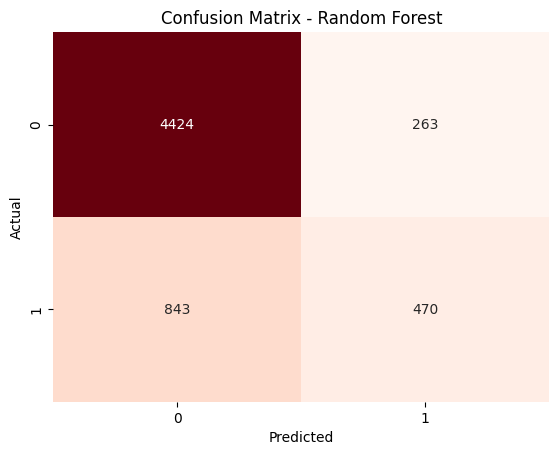

In [41]:
confusion_RF = confusion_matrix(y_test, RF_pred)
sns.heatmap(confusion_RF, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

In [42]:
# Logistic Regression
y_scores_logReg = logReg.predict_proba(X_test_scaled)[:, 1]
fpr_logReg, tpr_logReg, thresholds_logReg = roc_curve(y_test, y_scores_logReg)
auc_logReg = auc(fpr_logReg, tpr_logReg)

# Decision Tree
y_scores_DT = DT.predict_proba(X_test_scaled)[:, 1]
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_scores_DT)
auc_DT = auc(fpr_DT, tpr_DT)

# Random Forests
y_scores_RF = RF.predict_proba(X_test_scaled)[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_scores_RF)
auc_RF = auc(fpr_RF, tpr_RF)


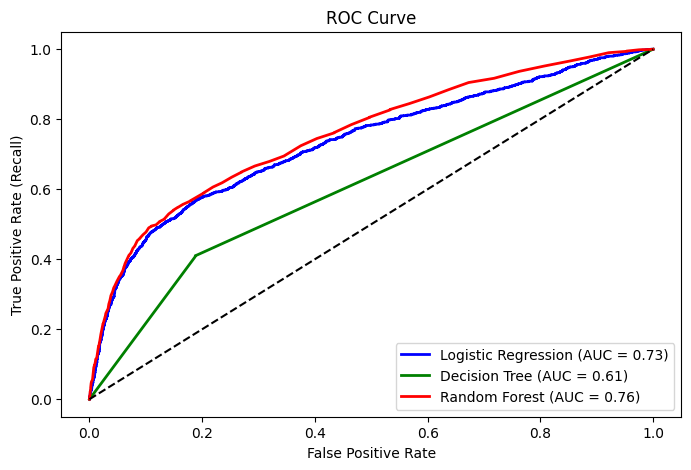

In [43]:
plt.figure(figsize=(8,5))

# Logistic Regression
plt.plot(fpr_logReg, tpr_logReg, color='blue', linewidth=2, label="Logistic Regression (AUC = {:.2f})".format(auc_logReg))

# Decision Tree
plt.plot(fpr_DT, tpr_DT, color='green', linewidth=2, label="Decision Tree (AUC = {:.2f})".format(auc_DT))

# Random Forest
plt.plot(fpr_RF, tpr_RF, color='red', linewidth=2, label="Random Forest (AUC = {:.2f})".format(auc_RF))

# Random classifier
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()